## Test $t$ de student para datos pareados: Venados

Edward García Hernández & Daniel Esteban Salazar Camacho - Estadística-2023_1

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Latex

In [25]:
# Creación del DataFrame
data = {'niv_adg_ai': [2.76, 5.18, 2.68, 3.05, 4.10, 7.05, 6.60, 4.79, 7.39, 7.30, 11.78, 3.90, 26.00, 67.48, 17.04],
        'niv_adg_di': [7.02, 3.10, 5.44, 3.99, 5.21, 10.26, 13.91, 18.53, 7.91, 4.85, 11.10, 3.74, 94.03, 94.03, 41.70]}

df = pd.DataFrame(data)
df['diferencia'] = df['niv_adg_di'] - df['niv_adg_ai']
df

,niv_adg_ai,niv_adg_di,diferencia
0,2.76,7.02,4.26
1,5.18,3.10,-2.08
2,2.68,5.44,2.76
3,3.05,3.99,0.94
4,4.10,5.21,1.11
5,7.05,10.26,3.21
6,6.60,13.91,7.31
7,4.79,18.53,13.74
8,7.39,7.91,0.52
9,7.30,4.85,-2.45


In [26]:
df.describe()

,niv_adg_ai,niv_adg_di,diferencia
count,15.000000,15.000000,15.000000
mean,11.806667,21.654667,9.848000
std,16.636413,30.920700,18.473627
min,2.680000,3.100000,-2.450000
25%,4.000000,5.030000,0.180000
50%,6.600000,7.910000,2.760000
75%,9.585000,16.220000,10.525000
max,67.480000,94.030000,68.030000


<Axes: xlabel='diferencia', ylabel='Count'>

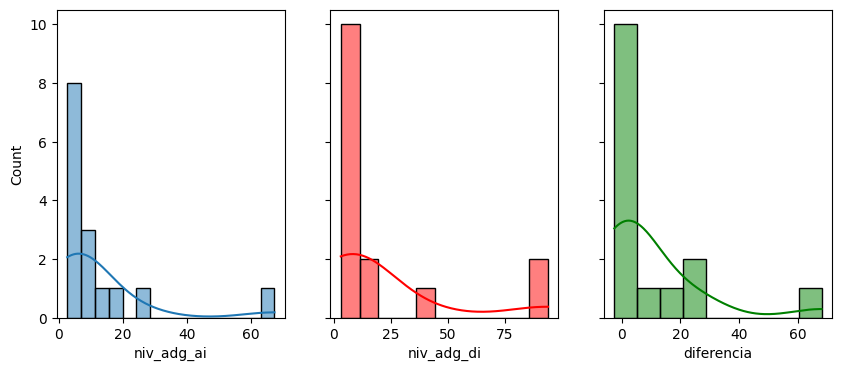

In [27]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (10, 4))

sns.histplot(df, x = 'niv_adg_ai', kde = True, ax = ax[0])
sns.histplot(df, x = 'niv_adg_di', kde = True, ax = ax[1], color = 'red')
sns.histplot(df, x = 'diferencia', kde = True, ax = ax[2], color = 'green')

La que hay que probar en este caso es si la inyección tiene algún efecto sobre los niveles de andrógenos en la sangre de los venados. Para ello se considera el siguiente test de hipótesis:

$H_0: \overline{d} = 0$, con $-t_{0.025} < t < t_{0.025}$,

$H_1: \overline{d} \neq 0$, con $t < -t_{0.025}$ o $t > t_{0.025}$.

Como la hipótesis alternativa es a dos lados, el test debe hacerse a dos colas. Además, como el tamaño de la muestra es menor a 30, se deben realizar inferencias basadas en los valores críticos para la distribución $t$ de Student.

(**Nota:** Los grados de libertad para el test son $v = 15 - 1 = 14$.)

Para realizar el test con las herramientas que Python, se utiliza el módulo ```stats``` de la librería ```scipy```. En este se encuentran dos test predefinidos:

1. Test $t$ de Student para datos relacionados dado por la función ```ttest_rel()```. Este toma dos poblaciones dependientes (una muestra por población) y determina si su media es igual o no. En este caso se toman las columnas ```niv_adg_ai```, los niveles de andrógenos antes de la inyección, y ```niv_adg_di```, los niveles de andrógenos después de la inyección.

2. Test $t$ de Student para una sóla muestra dado por la función ```ttest_1samp()```. Este toma una muestra de una población y determina si su media es igual o no a un valor determinado $\mu_0$. Para el caso de las muestras de sangre de los venados, el test se realiza sobre la columna ```diferencia```.

Text(0.5, 1.0, 'Distribución $t$ de Student con $v=14$')

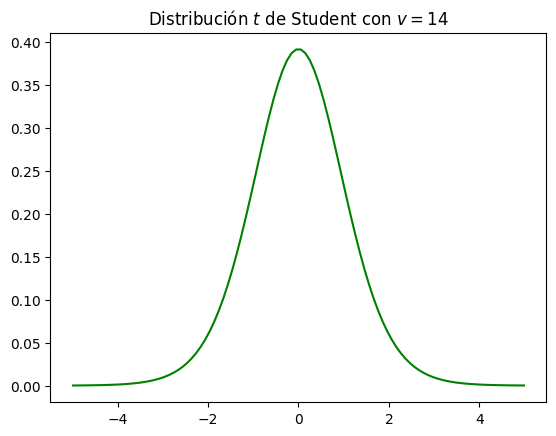

In [28]:
from scipy.stats import t

grados_de_libertad = 14
variable_aleatoria = t(grados_de_libertad)

x = np.linspace(t.ppf(0.0001, grados_de_libertad), t.ppf(0.9999, grados_de_libertad), 100)

plt.plot(x, variable_aleatoria.pdf(x), color = 'green')
plt.title(r'Distribución $t$ de Student con $v=14$')

In [29]:
alpha = 0.05
alpha_dos_colas = alpha/2
v_crit_1 = t.ppf(alpha_dos_colas, grados_de_libertad)
v_crit_2 = -v_crit_1
print(f'Los valores críticos son {v_crit_1:.5f} a izquierda y {v_crit_2:.5f} a derecha.')

Los valores críticos son -2.14479 a izquierda y 2.14479 a derecha.


Text(0.5, 1.0, 'Distribución $t$ de Student con $v=14$')

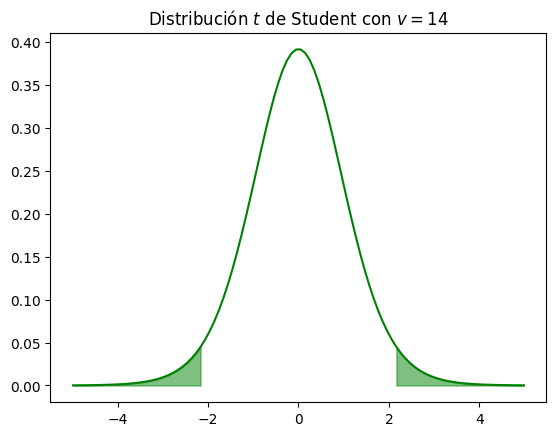

In [30]:
plt.plot(x, variable_aleatoria.pdf(x), color = 'green')
plt.fill_between(x = x, y1 = variable_aleatoria.pdf(x), where = (x < v_crit_1), color = 'green', alpha = 0.5)
plt.fill_between(x = x, y1 = variable_aleatoria.pdf(x), where = (x > v_crit_2), color = 'green', alpha = 0.5)
plt.title(r'Distribución $t$ de Student con $v=14$')

In [31]:
from scipy.stats import ttest_rel

muestra_ai = df['niv_adg_ai']
muestra_di = df['niv_adg_di']

t_stat, p_value = ttest_rel(muestra_ai, muestra_di)

display(Latex(r'$t \approx {0:.5f}$'.format(t_stat)), Latex(r'$p \approx {0:.2f}$'.format(p_value)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [32]:
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(df['diferencia'], 0)

display(Latex(r'$t \approx {0:.5f}$'.format(t_stat)), Latex(r'$p \approx {0:.2f}$'.format(p_value)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [33]:
if v_crit_1 < t_stat < v_crit_2:
    print('No se puede rechazar la hipótesis nula.\nNo se puede concluir que la inyección afecta los niveles de andrógenos en la sangre.')
else:
    print('Se rechaza la hipótesis nula.\nLos niveles de andrógenos se ven afectados por la inyección.')

No se puede rechazar la hipótesis nula.
No se puede concluir que la inyección afecta los niveles de andrógenos en la sangre.


Text(0.5, 1.0, 'Región crítica y valor $t$')

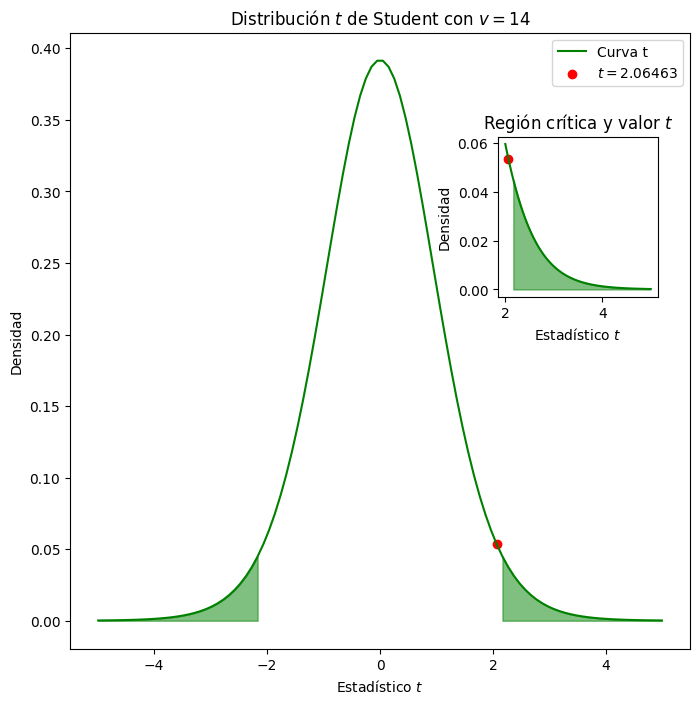

In [34]:
new_x = np.linspace(2, 5, 100)
fig, ax1 = plt.subplots(figsize = (8, 8))

ax1.plot(x, variable_aleatoria.pdf(x), color = 'green', label = 'Curva t')
ax1.scatter(t_stat, variable_aleatoria.pdf(t_stat), color = 'red', label = r'$t = 2.06463$')
ax1.legend()
ax1.set_xlabel(r'Estadístico $t$')
ax1.set_ylabel('Densidad')
ax1.fill_between(x = x, y1 = variable_aleatoria.pdf(x), where = (x < v_crit_1), color = 'green', alpha = 0.5)
ax1.fill_between(x = x, y1 = variable_aleatoria.pdf(x), where = (x > v_crit_2), color = 'green', alpha = 0.5)
ax1.set_title(r'Distribución $t$ de Student con $v=14$')

left, bottom, width, height = [0.66, 0.55, 0.20, 0.20]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(new_x, variable_aleatoria.pdf(new_x), color = 'green')
ax2.scatter(t_stat, variable_aleatoria.pdf(t_stat), color = 'red')
ax2.set_xlabel(r'Estadístico $t$')
ax2.set_ylabel('Densidad')
ax2.fill_between(x = x, y1 = variable_aleatoria.pdf(x), where = (x > v_crit_2), color = 'green', alpha = 0.5)
ax2.set_title(r'Región crítica y valor $t$')
#fig, ax1 = plt.subplots()

In [35]:
1 - t.cdf(2.06, 14)

0.029247104563128734

Esto último muestra que si $\alpha = 0.06$, sí se tendría algo de significancia y en consecuencia se puede decir que la inyección afecta los niveles de andrógenos.